# **Analiza podataka o nogometašima i regresijski modeli predviđanja njihovih cijena**
U ovom projektu analizirat ću podatke koji sadrže informacije o približno 17 000 FIFA-inih nogometaša (izvor: soFIFA.com). Podaci sadrže informacije specifične za nogometaše (ime, nacionalnost, ocjene igrača, pozicije, ...) koje ću za početak pročistiti i pripremiti kako bi ih mogla kvalitetno obraditi.

#### **Bibliteke potrebne za projekt**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#### **Učitavanje podataka**

In [6]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Strojno\ učenje

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Strojno učenje


In [7]:
data = pd.read_csv('fifa_players.csv')

## **1. Prikupljanje podataka i eksplorativna analiza**

### **Svojstva podataka**

Dimenzije i svojstva dataframe-a

In [8]:
print(f"Dimenzije dataframe-a s podacima: {data.shape}")
print(f"Broj elemenata: {data.size}")

Dimenzije dataframe-a s podacima: (17954, 51)
Broj elemenata: 915654


Nazivi stupaca (nazivi značajki)

In [9]:
print(data.columns)

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')


Prva dva reda dataframe-a

In [10]:
data.head(2)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22


Zadnja dva reda dataframe-a

In [11]:
data.tail(2)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,...,58,38,15,54,52,50,53,16,18,17
17953,Júnior Brumado,José Francisco dos Santos Júnior,5/15/1999,19,190.50,79.8,ST,Brazil,59,75,...,53,67,20,53,49,52,45,23,31,21


Deskriptivna statistika

In [12]:
data.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


Sažetak; sveobuhvatan pregled informacija o podacima

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

### **Pročišćavanje podataka**

Uklanjanje nedostajućih vrijednosti

In [14]:
# provjera postoji li nedefinirani podaci -> NaN
data.isna().sum()

,0
name,0
full_name,0
birth_date,0
age,0
height_cm,0
weight_kgs,0
positions,0
nationality,0
overall_rating,0
potential,0


In [15]:
# provjera postoji li nogometaš s brojem 0 na reprezentativnom dresu
data[data["national_jersey_number"] == 0]

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle


Vidimo da u DF-u postoje nedefinirani podaci, točnije vidimo da za 255 nogometaša cijena nije izražena, za njih 246 nije izražena plaća, za njih 1837 nije izražena otpusna klauzula, 17097 njih ne igra za reprezentaciju (pa nemaju ni ocjenu, ni poziciju, pa ni broj dresa u reprezentaciji).
<br>
NaN podataka se rješavamo tako što ćemo:
- igračima čija plaća, cijena i otpusna klauzula nije izražena stavljamo sve te vrijednosti na 0
- igračima koji ne igraju za reprezentaciju stavljamo kao reprezentaciju NNTH (**N**o **N**ational **T**eam **H**istory) kao i poziciju, onda je njihova ocjena i broj na dresu 0 (provjereno nitko nema broj 0 na dresu)

In [16]:
# plaća, cijena i otpusna klauzula
data[['value_euro', 'wage_euro', 'release_clause_euro']] = data[['value_euro', 'wage_euro', 'release_clause_euro']].apply(lambda x: x.fillna(value = 0))
# reprezentacija i pozicija
data[['national_team', 'national_team_position']] = data[['national_team', 'national_team_position']].apply(lambda x: x.fillna(value = "NNTH"))
# ocjena i broj na dresu
data[['national_rating', 'national_jersey_number']] = data[['national_rating', 'national_jersey_number']].apply(lambda x: x.fillna(value = 0))

In [17]:
#provjera
#data.isna().sum()

Uklanjanje dupliciranih podataka

In [18]:
data.duplicated().sum()

np.int64(0)

### **Statistika**

Sada ćemo izračunati statistike, tj. mjere srednje vrijednosti te mjere raspršenosti podataka te vizualizirati dobiveno samo kako bi dobili nekakvu predodžbu o distribuciji vrijednosti nogometaša budući da ćemo kasnije raditi modele koji će predviđati cijene nogometaša. Mjere povezanosti podataka ćemo računati i vizualizirati u dijelu s EDA-om.

**Mjere srednje vrijednosti**

Sredina uzorka

In [19]:
srednja_vrijednost = data['value_euro'].mean()
print(f"Prosječna vrijednost: {srednja_vrijednost:.2f} eura")

Prosječna vrijednost: 2444067.06 eura


Medijan uzorka

In [20]:
medijan = data['value_euro'].median()
print(f"Medijan: {medijan:.2f} eura")

Medijan: 700000.00 eura


**Mjere raspršenosti**

Interkvartilni raspon - IQR; srednjih 50% podataka u distribuciji

In [21]:
Q1 = np.percentile(data['value_euro'], 25)
Q3 = np.percentile(data['value_euro'], 75)

IQR = Q3 - Q1

print(f"Donji kvartil (Q1): {Q1:.2f} eura")
print(f"Gornji kvartil (Q3): {Q3:.2f} eura")
print(f"Interkvartilni raspon (IQR): {IQR:.2f} eura")

Donji kvartil (Q1): 300000.00 eura
Gornji kvartil (Q3): 2000000.00 eura
Interkvartilni raspon (IQR): 1700000.00 eura


Varijanca uzorka

In [24]:
varijanca = data['value_euro'].var()
varijanca

31968814957011.496

Varijanca uzorka je mjera raspršenosti ili raznolikosti podataka u uzorku pa nam daje informaciju o tome koliko su pojedinačne vrijednosti u uzorku različite od srednje vrijednosti uzorka (što je varijanca veća to su podaci više raspršeni oko srednje vrijednosti). Budući da je ovdje varijanca jako velika, zaključujemo da je je uzorak vrlo "heterogen". Isto tako na nju velik utjecaj ima i broj outlier-a, tj. što je više outliera to je varijanca veća.

Standardna devijacija uzorka

In [26]:
sd = data['value_euro'].std()
sd

5654097.183194811

Standardna devijacija mjeri prosječno odstupanje pojedinačnij vrijednosti od srednje vrijednosti. Standardnu devijaciju dobijemo kao kvadratni korijen varijance, pa budući da je ona bila prilično velika zaključeujemo da je i standardna devijacija velika.

**Distribucija podataka (vizualizacija)**

Kako smo primijetili kod velike varijance uzorka da je uzorak jako heterogen, tj. kako je veliko odstupanje od srednje vrijednosti uzorka, koristimo logaritamsku skalu (smanjujemo utjecaj outliera). Prvo radimo logaritamske transformacije svih vrijednosti koje "vidimo" na boxplot-u (srednju vrijednost, medijan i kvantile).

Srednja vrijednost (log): 13.44
Medijan (log): 13.46
Donji kvartil (log): 12.61
Gornji kvartil (log): 14.51
Interkvartilni raspon (IQR) (log): 1.90


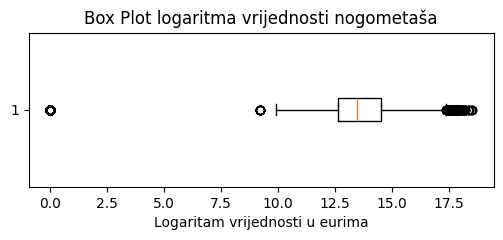

In [27]:
log_values = np.log1p(data['value_euro'])

mean_log = np.mean(log_values)
print(f"Srednja vrijednost (log): {mean_log:.2f}")

median_log = np.median(log_values)
print(f"Medijan (log): {median_log:.2f}")

Q1_log = np.percentile(log_values, 25)
Q3_log = np.percentile(log_values, 75)
IQR_log = Q3_log - Q1_log
print(f"Donji kvartil (log): {Q1_log:.2f}")
print(f"Gornji kvartil (log): {Q3_log:.2f}")
print(f"Interkvartilni raspon (IQR) (log): {IQR_log:.2f}")

plt.figure(figsize=(6, 2))
plt.boxplot(log_values, vert=False, whis=1.5)
plt.title('Box Plot logaritma vrijednosti nogometaša')
plt.xlabel('Logaritam vrijednosti u eurima')
plt.show()

### **Eksplorativna analiza podataka (EDA)**

Podjela značajki na numeričke i kategoričke

In [28]:
cat_cols = ['name', 'full_name', 'birth_date', 'positions', 'nationality', 'preferred_foot', 'body_type', 'national_team',
            'national_team_position']
numeric_cols = [col for col in data.columns if col not in cat_cols]
#numeric_cols

#### **Numeričke značajke**

Matrica korelacije

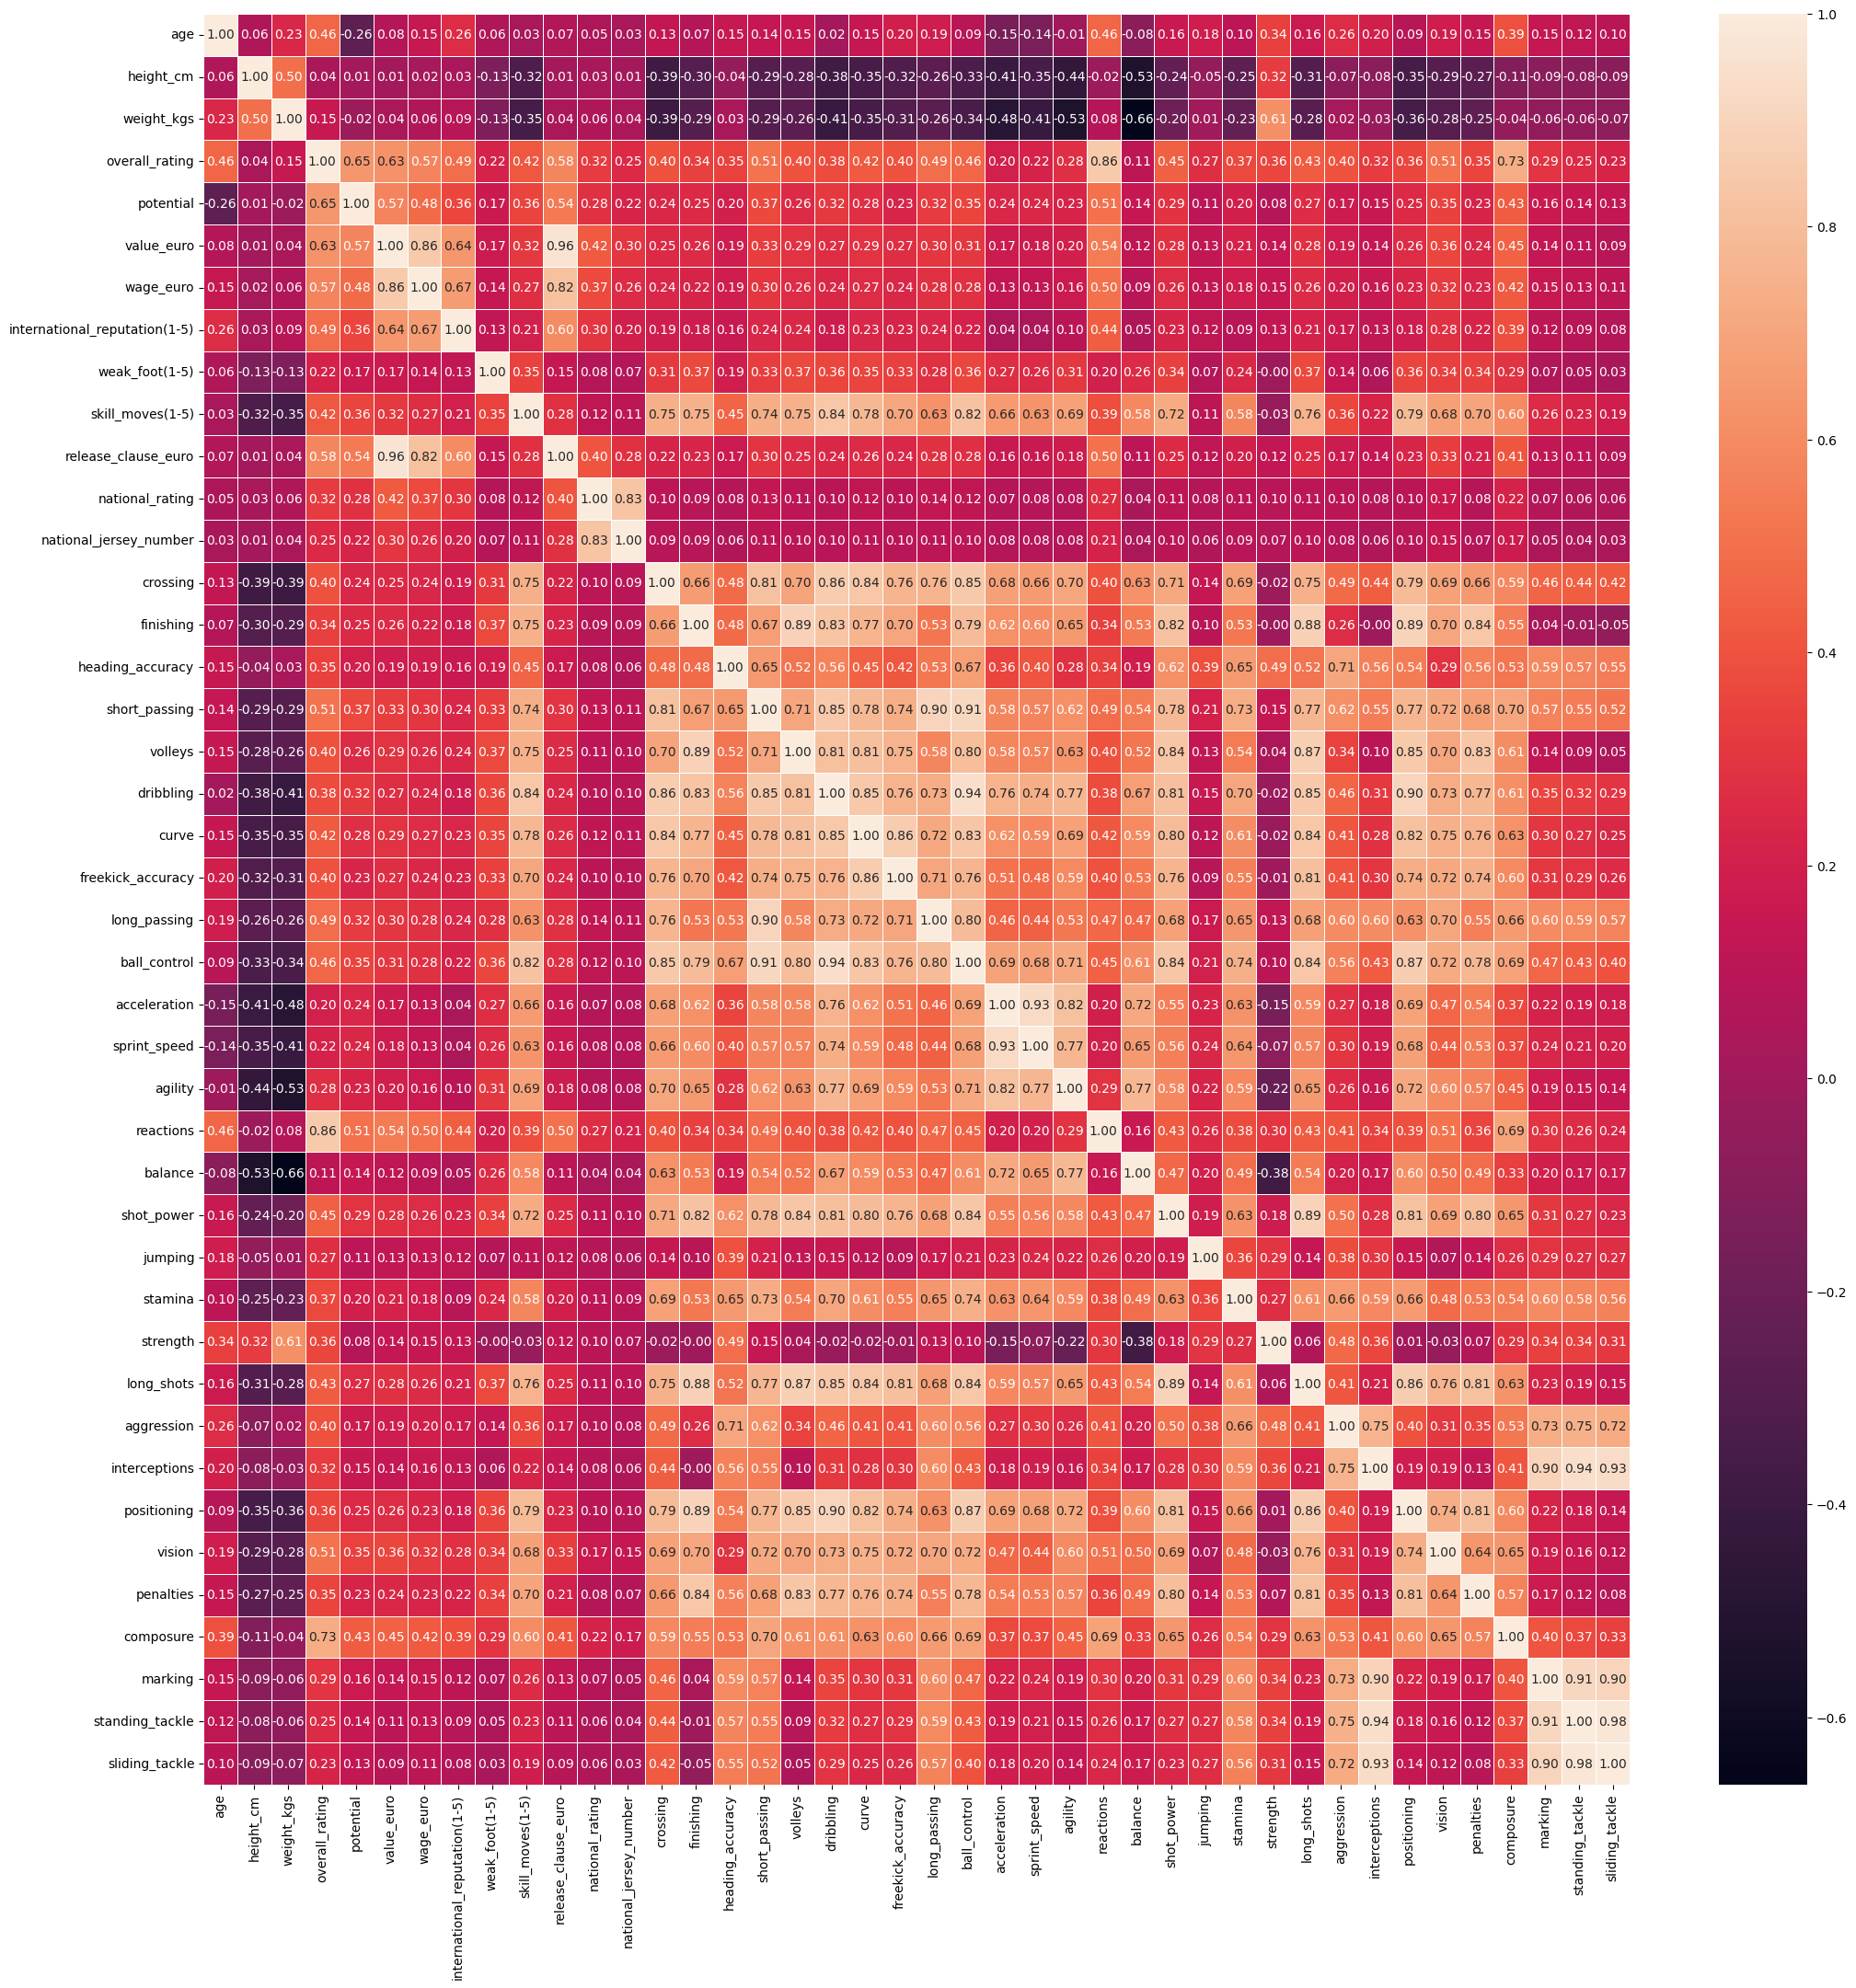

In [29]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(numeric_only=True, method="pearson"), annot=True, cmap="rocket", fmt='.2f', linewidths=.5)
plt.show()

Vizualizirat ćemo neke od značajki koje imaju visok koeficijent korelacije s vrijednosti (> 0.5) value_euro:
* od $0.8 \leq |r| <  1$ je riječ o jakoj korelaciji -> wage_euro(0.86), release_clause_euro(0.96)
* od $0.5 \leq |r| <  0.8$ je riječ o srednje jakoj korelaciji -> overall_rating(0.63), potential(0.57), international_reputation(1-5)(0.64), reactions(0.54)




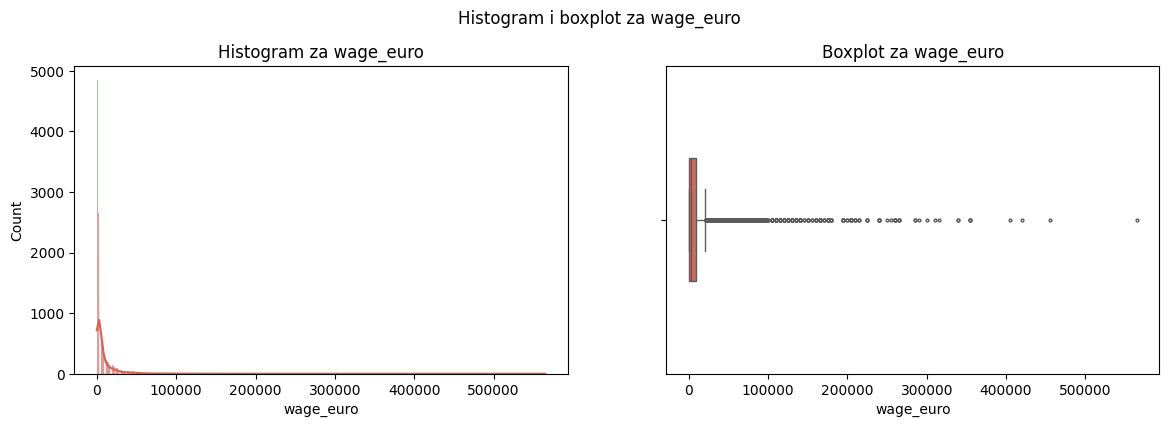

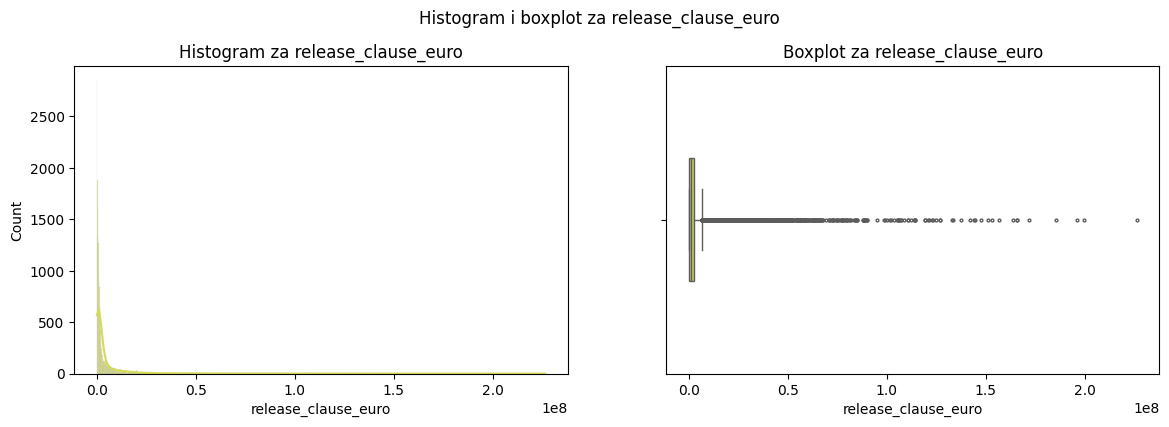

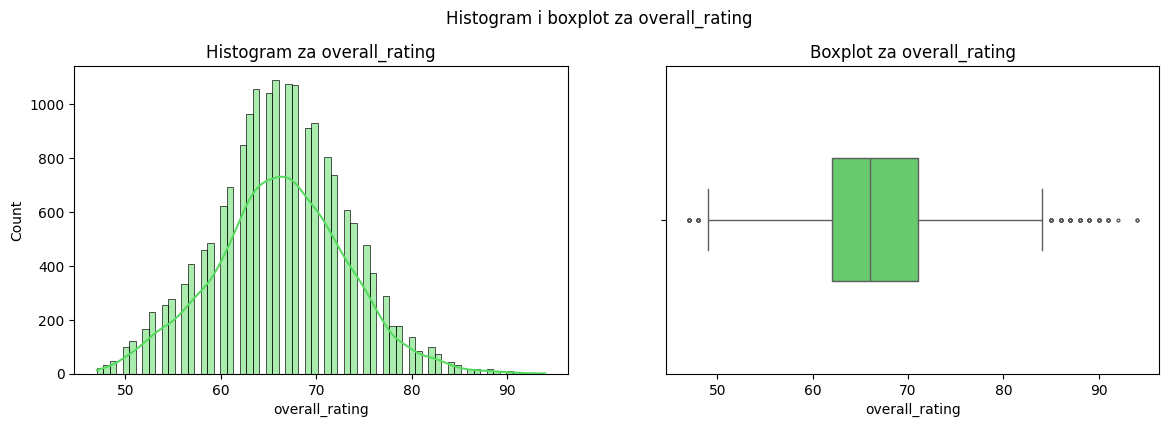

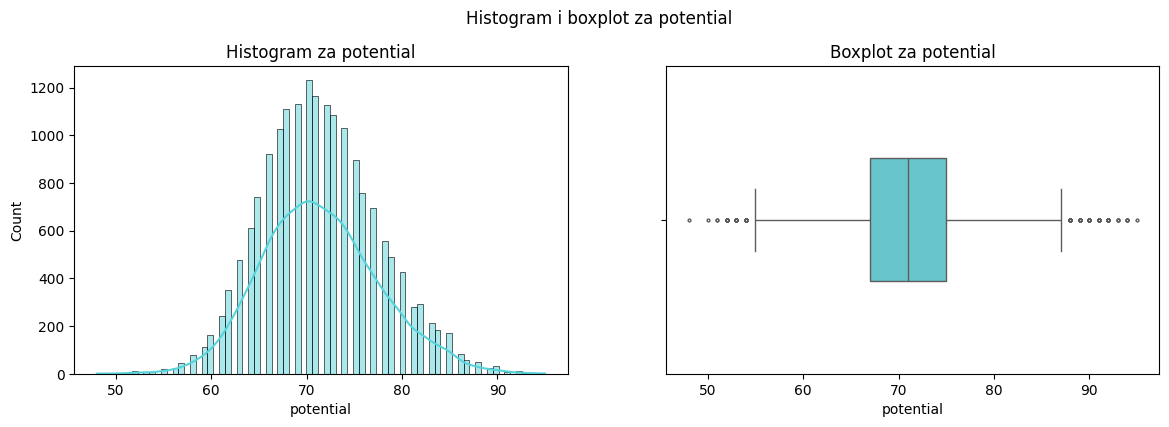

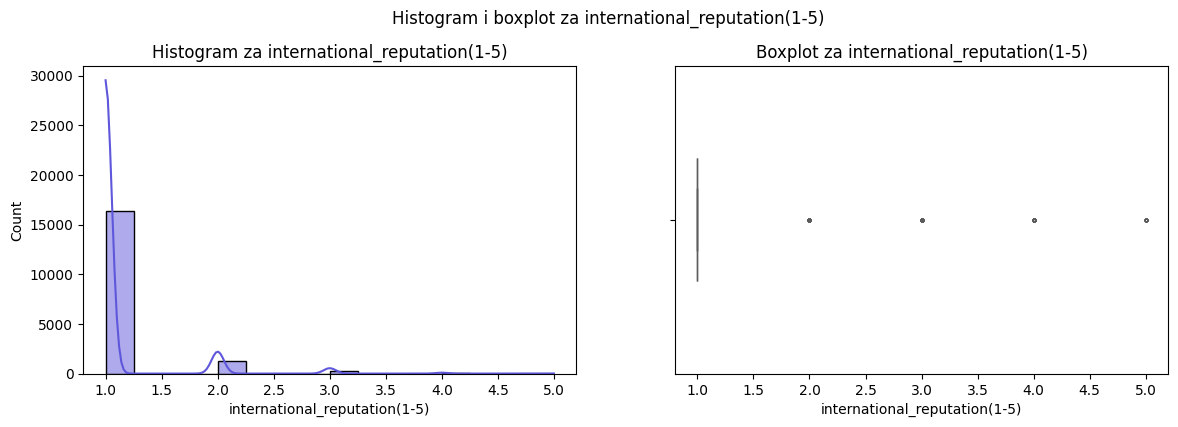

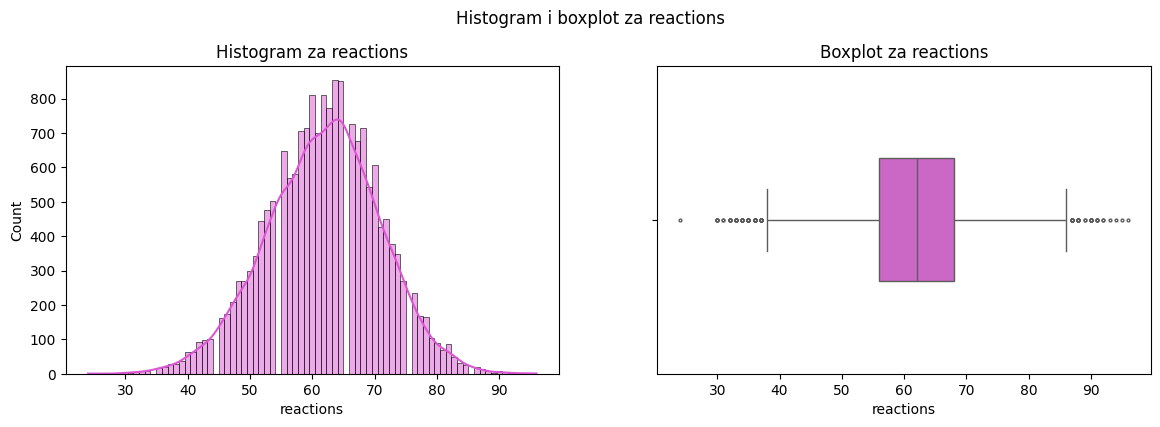

In [30]:
selected_cols = ['wage_euro', 'release_clause_euro', 'overall_rating', 'potential', 'international_reputation(1-5)', 'reactions']
data_selected = data[selected_cols]

colors = sns.color_palette("hls", len(selected_cols))

for idx, col in enumerate(selected_cols):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

    sns.histplot(data_selected, x=data_selected[col], kde=True, color=colors[idx], ax=ax1)
    ax1.set_title(f'Histogram za {col}')

    # Boxplot dijagram
    sns.boxplot(x=data_selected[col], width=0.4, linewidth=1, fliersize=2, color=colors[idx], ax=ax2)
    ax2.set_title(f'Boxplot za {col}')

    fig.suptitle(f"Histogram i boxplot za {col}", size=12, y=1.02)

    plt.show()

#### **Kategoričke značajke**

Vizualizirat ćemo one značajke koje možemo grupirati (npr. nema smisla da grupiramo nogometaše po imenu)

/tmp/ipython-input-31-2583820895.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col],


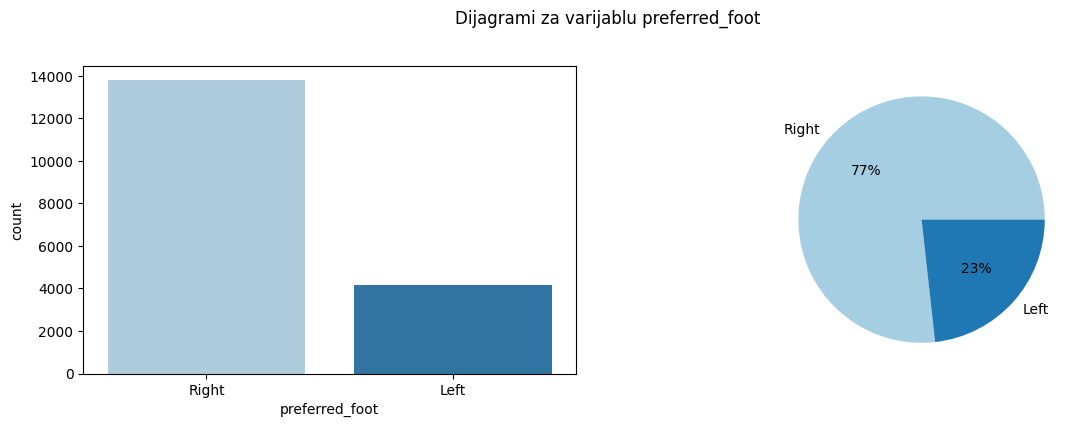

In [31]:
selected_cols = ['preferred_foot']
data_selected = data[selected_cols]

for idx, col in enumerate(selected_cols):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
  size_per_category = data.groupby(col).size().sort_values(ascending=False)

  ax = sns.countplot(x=data[col],
                     order=size_per_category.index,
                     ax=ax1,
                     palette='Paired')

  colors = sns.color_palette('Paired')[0:len(size_per_category)]
  ax = plt.pie(size_per_category,
               labels=size_per_category.index,
               autopct='%.0f%%',
               colors=colors)

  fig.suptitle(f"Dijagrami za varijablu {col}", size = 12, y = 1.02)
  plt.show()

/tmp/ipython-input-32-647237640.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


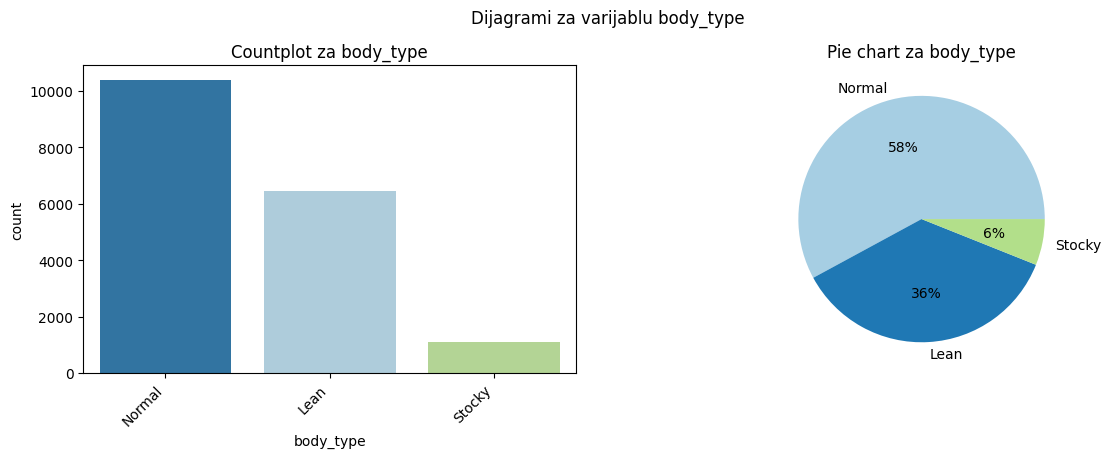

In [32]:
selected_cols = ['body_type']
data_selected = data[selected_cols]

kategorije = ['Normal', 'Lean', 'Stocky']
data_filter = data_selected[data_selected['body_type'].isin(kategorije)]

for idx, col in enumerate(selected_cols):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

    sns.countplot(x=col, hue=col, order=kategorije, data=data_filter, ax=ax1, palette='Paired', legend=False)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
    ax1.set_title(f'Countplot za {col}')

    size_per_category = data_filter[col].value_counts()
    ax2.pie(size_per_category, labels=size_per_category.index, autopct='%.0f%%', colors=sns.color_palette('Paired'))
    ax2.set_title(f'Pie chart za {col}')

    fig.suptitle(f"Dijagrami za varijablu {col}", size=12, y=1.02)
    plt.show()

/tmp/ipython-input-33-3613579779.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_filtered[selected_col], order=selected_nationalities, ax=ax1, palette='Paired')
/tmp/ipython-input-33-3613579779.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


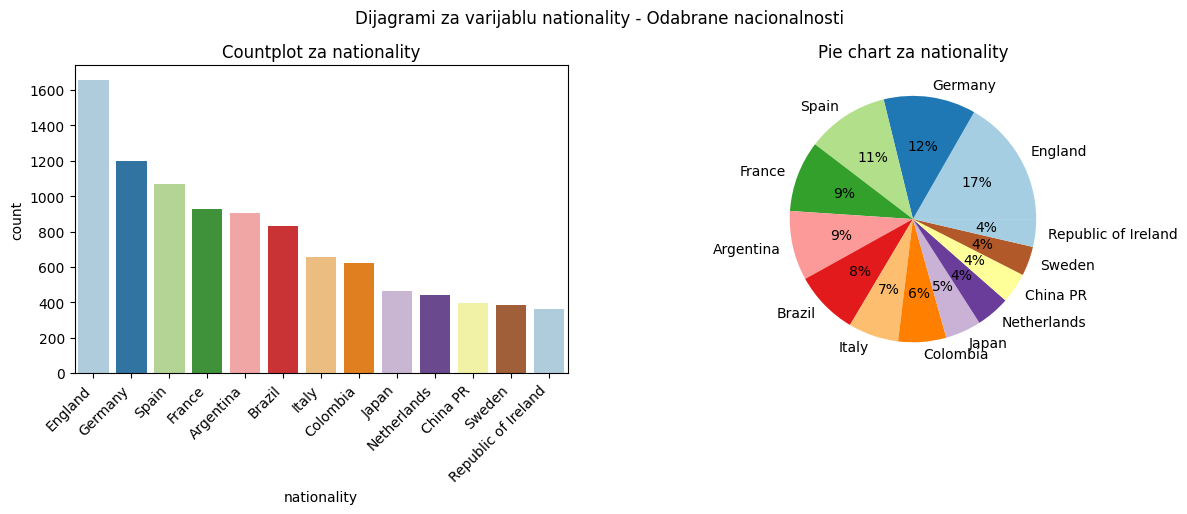

In [33]:
selected_col = 'nationality'
data_selected = data[[selected_col]]

nationality_counts = data_selected[selected_col].value_counts(normalize=True)

selected_nationalities = nationality_counts[nationality_counts > 0.02].index
data_filtered = data_selected[data_selected[selected_col].isin(selected_nationalities)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.countplot(x=data_filtered[selected_col], order=selected_nationalities, ax=ax1, palette='Paired')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
ax1.set_title(f'Countplot za {selected_col}')

size_per_nationality = data_filtered[selected_col].value_counts()
ax2.pie(size_per_nationality, labels=size_per_nationality.index, autopct='%.0f%%', colors=sns.color_palette('Paired'))
ax2.set_title(f'Pie chart za {selected_col}')

fig.suptitle(f"Dijagrami za varijablu {selected_col} - Odabrane nacionalnosti", size=12, y=1.02)
plt.show()

## **2. Čišćenje i priprema podataka**

### **Kodiranje kategoričkih varijabli**

Kodirat ću samo one varijable koje mogu imati značajan utjecaj na cijenu nogometaša i one kojih nema previše, a to su: preferred_foot i body_type

In [34]:
unique_foot = data['preferred_foot'].unique()
print("Različite vrijednosti za preferred_foot:", unique_foot)

unique_body = data['body_type'].unique()
print("Različite vrijednosti za body_type:", unique_body)

Različite vrijednosti za preferred_foot: ['Left' 'Right']
Različite vrijednosti za body_type: ['Messi' 'Lean' 'Normal' 'Stocky' 'Courtois' 'PLAYER_BODY_TYPE_25'
 'Akinfenwa' 'Shaqiri' 'Neymar' 'C. Ronaldo']


In [35]:
foot_mapping = {'Left':1, 'Right':2}
body_mapping = {'Lean':1, 'Normal':2, 'Stocky':3, 'Messi':4, 'Courtois':5, 'PLAYER_BODY_TYPE_25':6, 'Akinfenwa':7,
                'Shaqiri':8, 'Neymar':9, 'C. Ronaldo': 10}

data['preferred_foot'] = data['preferred_foot'].map(foot_mapping)
data['body_type'] = data['body_type'].map(body_mapping)

### **Priprema podataka za podjelu na skup za treniranje i testiranje**

Stvaranje skupa podataka za razdvajanje podataka na skup za treniranje i testiranje. U ovom novom skupu nalazit će se sve numeričke značajke i dvije značajke koje su prethodno kodirane.

In [36]:
numeric_cols
kodirani = ['preferred_foot', 'body_type']
podaci = numeric_cols + kodirani
data_odabrani = data[podaci]

## **3./4. Odabir odgovarajućeg modela/treniranje (učenje) modela i evaluacija**

#### **Model linearne regresije**

##### **Predviđanje cijene nogometaša koristeći značajku release_clause_euro -> koeficijent korelacije = 0.96**

In [37]:
X = data_odabrani[['release_clause_euro']]
y = data_odabrani['value_euro']

# podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# skaliranje podataka
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
lin_model1 = LinearRegression()
#treniranje modela
lin_model1.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
print(lin_model1.intercept_.round(3)) #a1
print(lin_model1.coef_.round(3)) #a0

2428017.824
[5314669.165]


Dakle, jednadžba dobivenog regresijskog pravca je:
$$y = - 2428017.824 + 5314669.165x,$$ što znači da svaki dodatni euro u značajki release_clause_euro rezultira povećanjem očekivane vrijednosti value_euro za 5314669.165 eura.

In [40]:
# predviđanje na skupu za testiranje
lin1_pred = lin_model1.predict(X_test_scaled)

In [41]:
# evaluacija
mse = mean_squared_error(y_test, lin1_pred)
r2 = r2_score(y_test, lin1_pred)
print(f'Mean Squared Error: {mse}')
print(f'Koeficijent determinacije: {r2}')

Mean Squared Error: 1681232037912.5017
Koeficijent determinacije: 0.9549703315783429


* model linearne regresije ima relativno nisku srednju kvadratnu pogrešku (MSE), što je dobro
* visok koeficijent determinacije (oko 95.5%), što također ukazuje na dobru sposobnost modela da objasni varijaciju ciljne varijable.

##### **Predviđanje cijene nogometaša koristeći značajku overall_rating -> koeficijent korelacije = 0.63**

In [42]:
X = data_odabrani[['overall_rating']]
y = data_odabrani['value_euro']

# podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# skaliranje podataka
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
lin_model2 = LinearRegression()
#treniranje modela
lin_model2.fit(X_train_scaled, y_train)

LinearRegression()

In [44]:
print(lin_model2.intercept_.round(3)) #a1
print(lin_model2.coef_.round(3)) #a0

2428017.824
[3481490.045]


Dakle, jednadžba dobivenog regresijskog pravca je
$$y = - 2428017.824 + 3481490.045x,$$ što znači da svaki dodatni bod u značajki overall_rating rezultira povećanjem očekivane vrijednosti value_euro za 3481490.045 eura

In [45]:
# predviđanje na skupu za testiranje
lin2_pred = lin_model2.predict(X_test_scaled)

In [46]:
# evaluacija
mse = mean_squared_error(y_test, lin2_pred)
r2 = r2_score(y_test, lin2_pred)
print(f'Mean Squared Error: {mse}')
print(f'Koeficijent deteminacije: {r2}')

Mean Squared Error: 23268688527253.137
Koeficijent deteminacije: 0.37677768127117006


* MSE sugerira da model ima veću pogrešku u predviđanju value_euro za pojedine primjere u testnom skupu
* MSE je visok; model nije vrlo precizan u predviđanju value_euro
* model objašnjava oko 37.7% varijacije u value_euro na temelju overall_rating
* koeficijent determinacije je niži od onog u prethodno treniranom modelu
* PRVI MODEL JE ZA SADA BOLJI OD DRUGOG

#### **Model multivarijabilne regresije**

Predviđanje cijene nogometaša na temelju svih ostalih značajki

In [47]:
X = data_odabrani.drop(['value_euro'], axis=1)
y = data_odabrani['value_euro']

# podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# skaliranje podataka
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
multivar_model = LinearRegression()
# treniranje modela
multivar_model.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
print(multivar_model.intercept_)
print(multivar_model.coef_)

2428017.823574462
[-4.66400411e+05 -7.37168875e+03  2.27949208e+04  6.70934905e+05
 -1.71309820e+05  9.82067055e+05  2.65704030e+05  2.27039298e+04
  1.09457097e+05  4.00139484e+06  7.71286532e+04  5.32484057e+04
 -6.31449138e+04 -2.44145959e+04 -2.25532447e+04  8.02892650e+03
  1.08885192e+05 -2.20959036e+04 -1.44897808e+04  6.44364410e+04
 -1.70062391e+04 -5.11434455e+04 -5.65404857e+04  3.96210208e+03
 -1.83628816e+04  6.39430654e+04  2.76581185e+04 -2.03490323e+04
 -1.30541248e+04  6.77477241e+04  1.42918595e+04  6.76812991e+03
 -2.77682491e+04 -4.25005202e+04  4.54270935e+04  6.39774181e+02
 -6.02893524e+04  1.14264277e+04  1.08328110e+05 -6.42615914e+03
 -1.35737166e+05  1.43509415e+02  1.20695978e+04]


In [50]:
# predviđanje na skupu za testiranje
multivar_pred = multivar_model.predict(X_test_scaled)

In [51]:
# evaluacija
multivar_mse = mean_squared_error(y_test, multivar_pred)
multivar_r2 = r2_score(y_test, multivar_pred)

print(f'Mean Squared Error (Multivarijabilna): {multivar_mse}')
print(f'Koeficijent determinacije: {multivar_r2}')

Mean Squared Error (Multivarijabilna): 1207868118419.7183
Koeficijent determinacije: 0.9676487839613954


* Značajno bolji rezultati u odnosu na modele linearne regresije
* Niža vrijednost MSE, a veća vrijednost r2 u odnosu na modele linearne regresije

#### **Model polinomijalne regresije**

In [52]:
X = data_odabrani.drop(['value_euro'], axis=1)
y = data_odabrani['value_euro']

# podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# skaliranje podataka
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Odabrala sam stupanj 2 zbog prenaučenosti

In [53]:
# stvoranje polinomijalnih značajki drugog stupnja (kvadratne)
poly_features = PolynomialFeatures(degree=2)
# transformacija značajki
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

In [54]:
poly_model = LinearRegression()
# treniranje modela
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [55]:
# transformacija testnih značajki u polinomijalne
y_pred_poly = poly_model.predict(X_test_poly)

In [56]:
# evaluacija
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (polinomijalna): {poly_mse}')
print(f'Koeficijent determinacije: {poly_r2}')

Mean Squared Error (polinomijalna): 465463010522.696
Koeficijent determinacije: 0.9875331634457741


* manji MSE označava bolju preciznost modela
* 0.988 koeficijent determinacije sugerira da je model uspio objasniti veći dio varijabilnosti u cijeni igrača
* visoka preciznost i dobro objašnjava varijabilnost cijena igrača
* MODEL JE BOLJI U ODNOSU NA PRETHODNE

#### **Model Support Vector regresije (SVR)**

Budući da smo u statističkom dijelu primjetili kako u uzorku ima mnogo outlier-a, sada treniramo SVR model. One je otporniji na otlier-e i cilj mu je minimizirati odstupanje predviđanja od stvarne vrijednosti.

In [57]:
X = data_odabrani.drop(['value_euro'], axis=1)
y = data_odabrani['value_euro']

# podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# skaliranje podataka
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
model_svr = SVR()
# treniranje modela
model_svr.fit(X_train_scaled, y_train)

SVR()

In [59]:
svr_pred = model_svr.predict(X_test_scaled)

In [60]:
# evaluacija modela
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print(f'Mean Squared Error (SVR): {svr_mse}')
print(f'Kofeicijent determinacije: {svr_r2}')

Mean Squared Error (SVR): 40605346343969.72
Kofeicijent determinacije: -0.08756271637898849


* visoka vrijednost MSE ukazuje na to da su predviđanja modela udaljena od stvarnih vrijednosti s velikim odstupanjem
* negativan R2 može ukazuje da model loše rad
* model nije adekvatan za ove podatke
* prethodni modeli (linearna regresija, polinomijalna regresija) bili bolji od SVR modela

#### **Model Ridge Regression i LASSO Regression**

##### **Model Ridge Regression**

Budući da je lienarna regresija dala bolje razulatate nego SVR, sada koristimo ridge regresiju koja je varijanta linearnog modela regresije koja uključuje regularizaciju. Regularizacija je tehnika koja se koristi kako bi se spriječilo prenaučenje modela, a Ridge regresija posebno dodaje "L2 regularization term" u funkciju gubitka tijekom treniranja. Ridge regresija se često koristi kada imamo kompleksne modele s velikim brojem značajki.

In [61]:
X = data_odabrani.drop(['value_euro'], axis=1)
y = data_odabrani['value_euro']

# podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# skaliranje značajki
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
alpha = 1.0 # umjerena razina regularizacije
model_ridge = Ridge(alpha=alpha)
# treniranje modela
model_ridge.fit(X_train_scaled, y_train)

Ridge()

In [63]:
# predviđanje na testnom skupu
ridge_pred = model_ridge.predict(X_test_scaled)

In [64]:
# evaluacija modela
mse_ridge = mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'Koeficijent determinacije (Ridge): {r2_ridge}')

Mean Squared Error (Ridge): 1207944124263.9072
Koeficijent determinacije (Ridge): 0.9676467482412302


* rezultati slični kao za model multivarijabilne regresije
* MSE je relativno visok; može ukazivati na to da model nije savršeno precizan, ali još uvijek pruža prihvatljive rezultate
* R2 vrijednost od 0.9676 sugerira da je model relativno dobro prilagođen podacima


##### **LASSO regresija**

Slična Ridge regresiji je LASSO regresija. LASSO (Least Absolute Shrinkage and Selection Operator) regresija je vrsta linearnog modela koji uključuje L1 regularizaciju. Ona se koristi za rješavanje problema regresije, ali također ima ugrađeni mehanizam za smanjenje utjecaja određenih značajki (atributa) kroz postavljanje odgovarajućih koeficijenata na nulu. Ovaj postupak omogućuje automatski odabir važnih značajki, što može poboljšati interpretabilnost modela i smanjiti rizik od prenaučenosti.

In [65]:
X = data_odabrani.drop(['value_euro'], axis=1)
y = data_odabrani['value_euro']

# podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# skaliranje značajki
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
alpha = 1.0
model_lasso = Lasso(alpha=alpha)
# treniranje modela
model_lasso.fit(X_train_scaled, y_train)

Lasso()

In [67]:
lasso_pred = model_lasso.predict(X_test_scaled)

In [68]:
# evaluacija modela
mse_lasso = mean_squared_error(y_test, lasso_pred)
r2_lasso = r2_score(y_test, lasso_pred)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'Koeficijent determinacije: {r2_lasso}')

Mean Squared Error (Lasso): 1207866700660.0896
Koeficijent determinacije: 0.9676488219342895


* MSE prilično nizak
* visok koeficijent deteminacije
